# Capstone Project 
## The Battle of Neighborhoods in Scarborough, Toronto

### 1. Installing and Importing Python Libraries and Dependencies

In [16]:
!pip install geocoder
!pip install folium

Importing Libraries

In [17]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None) # display all the rows and columns
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


### 2.  Data Extraction and Cleaning
Using BeautifulSoup Scraping List of Postal Codes of Given Wikipedia Page. 
Link: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [18]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
extracting_data = requests.get(url).text
wiki_data = BeautifulSoup(extracting_data, 'lxml') # extract data from webpage

Convert the content of PostalCode HTML table to dataframe

In [19]:
column_names = ['Postalcode','Borough','Neighborhood'] # build a form
toronto = pd.DataFrame(columns = column_names) # data structure formation

content = wiki_data.find('div', class_='mw-parser-output')
table = content.table.tbody
postcode = 0
borough = 0
neighborhood = 0

for tr in table.find_all('tr'): 
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            postcode = td.text # save the first data in the line as original context in postcode
            i = i + 1
        elif i == 1:
            borough = td.text # save the next data in the line into borough
            i = i + 1
        elif i == 2: # convert the the data with NETER into ']' 
            neighborhood = td.text.strip('\n').replace(']','')  
    toronto = toronto.append({'Postalcode': postcode,'Borough': borough,'Neighborhood': neighborhood},ignore_index=True)

In [20]:
# clean dataframe 
toronto = toronto[toronto.Borough!='Not assigned\n'] #remove the data with Not Assigned
toronto = toronto[toronto.Borough!= 0]  # remvoe the line with 0
toronto.reset_index(drop = True, inplace = True) # reset indexes as the original table 


In [21]:
i = 0
for i in range(0,toronto.shape[0]):  
    if toronto.iloc[i][2] == 'Not assigned':    # if the second line equals Not Assigned  moving the 
        toronto.iloc[i][2] = toronto.iloc[i][1] # move the 1 into the 2
        i = i+1

In [22]:
df = toronto.groupby(['Postalcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df.head()

Postalcode        Borough                            Neighborhood
0      M1B\n  Scarborough\n                          Malvern, Rouge
1      M1C\n  Scarborough\n  Rouge Hill, Port Union, Highland Creek
2      M1E\n  Scarborough\n       Guildwood, Morningside, West Hill
3      M1G\n  Scarborough\n                                  Woburn
4      M1H\n  Scarborough\n                               Cedarbrae

In [23]:
df.describe()

Postalcode       Borough Neighborhood
count         103           103          103
unique        103            10           99
top         M8W\n  North York\n    Downsview
freq            1            24            4

In [24]:
df = df.dropna()
empty = 'Not assigned'
df = df[(df.Postalcode != empty ) & (df.Borough != empty) & (df.Neighborhood != empty)]
df.head()

Postalcode        Borough                            Neighborhood
0      M1B\n  Scarborough\n                          Malvern, Rouge
1      M1C\n  Scarborough\n  Rouge Hill, Port Union, Highland Creek
2      M1E\n  Scarborough\n       Guildwood, Morningside, West Hill
3      M1G\n  Scarborough\n                                  Woburn
4      M1H\n  Scarborough\n                               Cedarbrae

In [55]:
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = df.groupby(['Postalcode', 'Borough'])
df_2 = grp.apply(neighborhood_list).reset_index(name='Neighborhood')

df_2.describe()

Postalcode       Borough Neighborhood
count         103           103          103
unique        103            10           99
top         M8W\n  North York\n    Downsview
freq            1            24            4

In [56]:
print(df_2.shape)
df_2.head(103)

(103, 3)


Postalcode             Borough  \
0        M1B\n       Scarborough\n   
1        M1C\n       Scarborough\n   
2        M1E\n       Scarborough\n   
3        M1G\n       Scarborough\n   
4        M1H\n       Scarborough\n   
5        M1J\n       Scarborough\n   
6        M1K\n       Scarborough\n   
7        M1L\n       Scarborough\n   
8        M1M\n       Scarborough\n   
9        M1N\n       Scarborough\n   
10       M1P\n       Scarborough\n   
11       M1R\n       Scarborough\n   
12       M1S\n       Scarborough\n   
13       M1T\n       Scarborough\n   
14       M1V\n       Scarborough\n   
15       M1W\n       Scarborough\n   
16       M1X\n       Scarborough\n   
17       M2H\n        North York\n   
18       M2J\n        North York\n   
19       M2K\n        North York\n   
20       M2L\n        North York\n   
21       M2M\n        North York\n   
22       M2N\n        North York\n   
23       M2P\n        North York\n   
24       M2R\n        North York\n   
25       M3A\n        North York\n   
26       M3B\n        North York\n   
27       M3C\n        North York\n   
28       M3H\n        North York\n   
29       M3J\n        North York\n   
30       M3K\n        North York\n   
31       M3L\n        North York\n   
32       M3M\n        North York\n   
33       M3N\n        North York\n   
34       M4A\n        North York\n   
35       M4B\n         East York\n   
36       M4C\n         East York\n   
37       M4E\n      East Toronto\n   
38       M4G\n         East York\n   
39       M4H\n         East York\n   
40       M4J\n         East York\n   
41       M4K\n      East Toronto\n   
42       M4L\n      East Toronto\n   
43       M4M\n      East Toronto\n   
44       M4N\n   Central Toronto\n   
45       M4P\n   Central Toronto\n   
46       M4R\n   Central Toronto\n   
47       M4S\n   Central Toronto\n   
48       M4T\n   Central Toronto\n   
49       M4V\n   Central Toronto\n   
50       M4W\n  Downtown Toronto\n   
51       M4X\n  Downtown Toronto\n   
52       M4Y\n  Downtown Toronto\n   
53       M5A\n  Downtown Toronto\n   
54       M5B\n  Downtown Toronto\n   
55       M5C\n  Downtown Toronto\n   
56       M5E\n  Downtown Toronto\n   
57       M5G\n  Downtown Toronto\n   
58       M5H\n  Downtown Toronto\n   
59       M5J\n  Downtown Toronto\n   
60       M5K\n  Downtown Toronto\n   
61       M5L\n  Downtown Toronto\n   
62       M5M\n        North York\n   
63       M5N\n   Central Toronto\n   
64       M5P\n   Central Toronto\n   
65       M5R\n   Central Toronto\n   
66       M5S\n  Downtown Toronto\n   
67       M5T\n  Downtown Toronto\n   
68       M5V\n  Downtown Toronto\n   
69       M5W\n  Downtown Toronto\n   
70       M5X\n  Downtown Toronto\n   
71       M6A\n        North York\n   
72       M6B\n        North York\n   
73       M6C\n              York\n   
74       M6E\n              York\n   
75       M6G\n  Downtown Toronto\n   
76       M6H\n      West Toronto\n   
77       M6J\n      West Toronto\n   
78       M6K\n      West Toronto\n   
79       M6L\n        North York\n   
80       M6M\n              York\n   
81       M6N\n              York\n   
82       M6P\n      West Toronto\n   
83       M6R\n      West Toronto\n   
84       M6S\n      West Toronto\n   
85       M7A\n  Downtown Toronto\n   
86       M7R\n       Mississauga\n   
87       M7Y\n      East Toronto\n   
88       M8V\n         Etobicoke\n   
89       M8W\n         Etobicoke\n   
90       M8X\n         Etobicoke\n   
91       M8Y\n         Etobicoke\n   
92       M8Z\n         Etobicoke\n   
93       M9A\n         Etobicoke\n   
94       M9B\n         Etobicoke\n   
95       M9C\n         Etobicoke\n   
96       M9L\n        North York\n   
97       M9M\n        North York\n   
98       M9N\n              York\n   
99       M9P\n         Etobicoke\n   
100      M9R\n         Etobicoke\n   
101      M9V\n         Etobicoke\n   
102      M9W\n         Etobicoke\n   

                                          Neighborh

In [57]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code)) # get cordianate
        lati_long_coords = g.latlng  # get latitude and longtitude
    return lati_long_coords
    
get_latilong('M4G')

[43.70909000000006, -79.36409999999995]

In [58]:
# Retrieving Postal Code Co-ordinates
postal_codes = df_2['Postalcode']    # store the postcode
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]# return the postcode in the totlelist with coordinates 

In [59]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude']) # set the table with theLatitude and Longitude
df_2['Latitude'] = df_coords['Latitude']
df_2['Longitude'] = df_coords['Longitude']

In [60]:
df_2[df_2.Postalcode == 'M5G\n'] # find M5G

Postalcode             Borough        Neighborhood  Latitude  Longitude
57      M5G\n  Downtown Toronto\n  Central Bay Street  43.65609  -79.38493

In [61]:
df_2.head(10)

Postalcode        Borough                                     Neighborhood  \
0      M1B\n  Scarborough\n                                   Malvern, Rouge   
1      M1C\n  Scarborough\n           Rouge Hill, Port Union, Highland Creek   
2      M1E\n  Scarborough\n                Guildwood, Morningside, West Hill   
3      M1G\n  Scarborough\n                                           Woburn   
4      M1H\n  Scarborough\n                                        Cedarbrae   
5      M1J\n  Scarborough\n                              Scarborough Village   
6      M1K\n  Scarborough\n      Kennedy Park, Ionview, East Birchmount Park   
7      M1L\n  Scarborough\n                  Golden Mile, Clairlea, Oakridge   
8      M1M\n  Scarborough\n  Cliffside, Cliffcrest, Scarborough Village West   
9      M1N\n  Scarborough\n                      Birch Cliff, Cliffside West   

   Latitude  Longitude  
0  43.81153  -79.19552  
1  43.78564  -79.15871  
2  43.76575  -79.17520  
3  43.76820  -79.21761  
4  43.76969  -79.23944  
5  43.74309  -79.23526  
6  43.72861  -79.26367  
7  43.71406  -79.28412  
8  43.72360  -79.23496  
9  43.69539  -79.26194

In [62]:
address = 'Scarborough,Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Seattle,Washington are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Seattle,Washington are 43.773077, -79.257774.


### 3. Map of Scarborough


In [63]:
map_Scarborough = folium.Map(location=[latitude_x, longitude_y], zoom_start=10) # set x and y as center

for lat, lng, nei in zip(df_2['Latitude'], df_2['Longitude'], df_2['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True) # dispaly specific style
    folium.CircleMarker( # display a circle
        
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

In [64]:
address = 'Scarborough,Toronto'

geolocator = Nominatim() # map seraching
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The Geograpical Co-ordinate of Neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Neighborhood_1 are 43.773077, -79.257774.


In [65]:
# connect to Foursquare
CLIENT_ID = 'BIYV53BZXCDKK3N0XPRMUIDBAYMQTDRA0ZA5KRYE2I51NMBM' # my Foursquare ID
CLIENT_SECRET = 'BD50ALR3AY54CKQG5KQPFSLBW212Q2VUSPMLTWRUUTR2RYG0' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: BIYV53BZXCDKK3N0XPRMUIDBAYMQTDRA0ZA5KRYE2I51NMBM
CLIENT_SECRET: BD50ALR3AY54CKQG5KQPFSLBW212Q2VUSPMLTWRUUTR2RYG0


In [66]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [67]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.events.count', 'venue.events.summary', 'venue.id',
       'venue.location.address', 'venue.location.cc', 'venue.location.city',
       'venue.location.country', 'venue.location.crossStreet',
       'venue.location.distance', 'venue.location.formattedAddress',
       'venue.location.labeledLatLngs', 'venue.location.lat',
       'venue.location.lng', 'venue.location.neighborhood',
       'venue.location.postalCode', 'venue.location.state', 'venue.name',
       'venue.photos.count', 'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [68]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### 4. Nearby Venues/Locations

BD50ALR3AY54CKQG5KQPFSLBW212Q2VUSPMLTWRUUTR2RYG0
BIYV53BZXCDKK3N0XPRMUIDBAYMQTDRA0ZA5KRYE2I51NMBM

In [69]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

venue.name                                   venue.categories  \
0                 SEPHORA  [{'id': '4bf58dd8d48988d10c951735', 'name': 'C...   
1    American Eagle Store  [{'id': '4bf58dd8d48988d103951735', 'name': 'C...   
2            Disney Store  [{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...   
3      Shoppers Drug Mart  [{'id': '4bf58dd8d48988d10f951735', 'name': 'P...   
4  Chipotle Mexican Grill  [{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...   

   venue.location.lat  venue.location.lng  
0           43.775017          -79.258109  
1           43.776012          -79.258334  
2           43.775537          -79.256833  
3           43.773305          -79.251662  
4           43.776410          -79.258069

### 5. Categories of Nearby Venues/Locations


In [70]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)  #iterate all the list

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

name          categories        lat        lng
0                 SEPHORA      Cosmetics Shop  43.775017 -79.258109
1    American Eagle Store      Clothing Store  43.776012 -79.258334
2            Disney Store    Toy / Game Store  43.775537 -79.256833
3      Shoppers Drug Mart            Pharmacy  43.773305 -79.251662
4  Chipotle Mexican Grill  Mexican Restaurant  43.776410 -79.258069

In [71]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories) # one dimention array
a.value_counts()[:10]

Clothing Store       7
Coffee Shop          5
Restaurant           4
Sandwich Place       2
Cosmetics Shop       2
Gas Station          2
Pharmacy             2
Electronics Store    2
Grocery Store        1
Men's Store          1
Name: categories, dtype: int64

In [72]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [73]:
# Nearby Venues
Scarborough_venues = getNearbyVenues(names=df_2['Neighborhood'],
                                   latitudes=df_2['Latitude'],
                                   longitudes=df_2['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [74]:
print('There are {} Uniques Categories.'.format(len(Scarborough_venues['Venue Category'].unique())))
Scarborough_venues.groupby('Neighborhood').count().head()

There are 303 Uniques Categories.


Neighborhood Latitude  \
Neighborhood                                                             
Agincourt                                                           30   
Alderwood, Long Branch                                               6   
Bathurst Manor, Wilson Heights, Downsview North                      4   
Bayview Village                                                      3   
Bedford Park, Lawrence Manor East                                   24   

                                                 Neighborhood Longitude  \
Neighborhood                                                              
Agincourt                                                            30   
Alderwood, Long Branch                                                6   
Bathurst Manor, Wilson Heights, Downsview North                       4   
Bayview Village                                                       3   
Bedford Park, Lawrence Manor East                                    24   

                                                 Venue  Venue Latitude  \
Neighborhood                                                             
Agincourt                                           30              30   
Alderwood, Long Branch                               6               6   
Bathurst Manor, Wilson Heights, Downsview North      4               4   
Bayview Village                                      3               3   
Bedford Park, Lawrence Manor East                   24              24   

                                                 Venue Longitude  \
Neighborhood                                                       
Agincourt                                                     30   
Alderwood, Long Branch                                         6   
Bathurst Manor, Wilson Heights, Downsview North                4   
Bayview Village                                                3   
Bedford Park, Lawrence Manor East                             24   

                                                 Venue Category  
Neighborhood                                                     
Agincourt                                                    30  
Alderwood, Long Branch                                        6  
Bathurst Manor, Wilson Heights, Downsview North               4  
Bayview Village                                               3  
Bedford Park, Lawrence Manor East                            24

### One Hot Encoding of Features

In [75]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="") # convert different values into 0/1 just like one hot code

# add neighborhood column back to dataframe
Scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] # change the original data into one hot code

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_onehot.head(5)

Zoo Exhibit  Accessories Store  Afghan Restaurant  African Restaurant  \
0            0                  0                  0                   0   
1            1                  0                  0                   0   
2            1                  0                  0                   0   
3            0                  0                  0                   0   
4            0                  0                  0                   0   

   Airport  American Restaurant  Animal Shelter  Antique Shop  Aquarium  \
0        0                    0               0             0         0   
1        0                    0               0             0         0   
2        0                    0               0             0         0   
3        0                    0               0             0         0   
4        0                    0               0             0         0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   
2            0           0                    0                 0   
3            0           0                    0                 0   
4            0           0                    0                 0   

   Athletics & Sports  Auto Dealership  Auto Garage  Auto Workshop  \
0                   0                0            0              0   
1                   0                0            0              0   
2                   0                0            0              0   
3                   0                0            0              0   
4                   0                0            0              0   

   Automotive Shop  BBQ Joint  Baby Store  Badminton Court  Bagel Shop  \
0                0          0           0                0           0   
1                0          0           0                0           0   
2                0          0           0                0           0   
3                0          0           0                0           0   
4                0          0           0                0           0   

   Bakery  Bank  Bar  Baseball Field  Baseball Stadium  Basketball Stadium  \
0       0     0    0               0                 0                   0   
1       0     0    0               0                 0                   0   
2       0     0    0               0                 0                   0   
3       0     0    1               0                 0                   0   
4       0     0    1               0                 0                   0   

   Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Store  \
0      0          0                0         0           0   
1      0          0                0         0           0   
2      0          0                0         0           0   
3      0          0                0         0           0   
4      0          0                0         0           0   

   Belgian Restaurant  Bike Rental / Bike Share  Bike Shop  Bistro  \
0                   0                         0          0       0   
1                   0                         0          0       0   
2                   0                         0          0       0   
3                   0                         0          0       0   
4                   0                         0          0       0   

   Board Shop  Bookstore  Botanical Garden  Boutique  Brazilian Restaurant  \
0           0          0                 0         0                     0   
1           0          0                 0         0                     0   
2           0          0                 0         0                     0   
3           0          0                 0         0                     0   
4           0          0                 0         0                     0   

   Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  Building  Burger Joint  \
0  

In [76]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
                      venue  freq
0             Shopping Mall  0.10
1               Pizza Place  0.07
2        Chinese Restaurant  0.07
3                      Pool  0.03
4  Mediterranean Restaurant  0.03


---- Alderwood, Long Branch ----
            venue  freq
0             Pub  0.17
1     Gas Station  0.17
2     Pizza Place  0.17
3  Sandwich Place  0.17
4     Coffee Shop  0.17


---- Bathurst Manor, Wilson Heights, Downsview North ----
                        venue  freq
0        Other Great Outdoors  0.25
1           Convenience Store  0.25
2                        Park  0.25
3                    Pharmacy  0.25
4  Modern European Restaurant  0.00


---- Bayview Village ----
              venue  freq
0              Park  0.33
1             Trail  0.33
2  Asian Restaurant  0.33
3       Zoo Exhibit  0.00
4       Music Store  0.00


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0         Pizza Place  0.08
1      Sandwich Place  0.08
2  Ital

                                      venue  freq
0                                      Park  0.33
1                                  Pharmacy  0.17
2                        Chinese Restaurant  0.17
3  Residential Building (Apartment / Condo)  0.17
4                                    Bakery  0.17


---- Humber Summit ----
                        venue  freq
0      Furniture / Home Store   0.2
1        Caribbean Restaurant   0.2
2         Arts & Crafts Store   0.2
3                      Bakery   0.2
4  Construction & Landscaping   0.2


---- Humberlea, Emery ----
                       venue  freq
0                Coffee Shop  0.29
1  Latin American Restaurant  0.14
2                       Park  0.14
3                       Café  0.14
4             Discount Store  0.14


---- Humewood-Cedarvale ----
               venue  freq
0  Convenience Store  0.17
1       Hockey Arena  0.17
2      Grocery Store  0.17
3              Field  0.17
4              Trail  0.17


---- India Bazaar, The B

                venue  freq
0         Coffee Shop  0.11
1               Hotel  0.06
2                Café  0.05
3                 Bar  0.04
4  Italian Restaurant  0.03


---- Studio District ----
         venue  freq
0  Coffee Shop  0.07
1          Bar  0.05
2         Café  0.05
3       Bakery  0.05
4        Diner  0.05


---- Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park ----
                 venue  freq
0                  Pub  0.11
1         Skating Rink  0.11
2          Coffee Shop  0.11
3  Fried Chicken Joint  0.05
4                 Bank  0.05


---- The Annex, North Midtown, Yorkville ----
                           venue  freq
0             Italian Restaurant  0.08
1                 Sandwich Place  0.08
2                           Park  0.08
3  Vegetarian / Vegan Restaurant  0.05
4             Mexican Restaurant  0.05


---- The Beaches ----
         venue  freq
0          Bar  0.09
1          Pub  0.09
2        Trail  0.04
3         Café  0.04
4  Cheese Shop 

In [77]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Most Common venues near neighborhood


In [78]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):  #
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns) # new a data table
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)
    # reconstruct the data structure from the largeset number to the least 

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Agincourt         Shopping Mall   
1                           Alderwood, Long Branch           Gas Station   
2  Bathurst Manor, Wilson Heights, Downsview North     Convenience Store   
3                                  Bayview Village                  Park   
4                Bedford Park, Lawrence Manor East           Pizza Place   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0    Chinese Restaurant           Pizza Place                  Bank   
1           Pizza Place                   Pub           Coffee Shop   
2  Other Great Outdoors              Pharmacy                  Park   
3                 Trail      Asian Restaurant           Yoga Studio   
4        Sandwich Place           Coffee Shop    Italian Restaurant   

  5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
0        Sandwich Place    Dim Sum Restaurant                       Bakery   
1        Sandwich Place                   Gym  Eastern European Restaurant   
2           Yoga Studio     Electronics Store                      Dog Run   
3     Electronics Store               Dog Run             Doner Restaurant   
4              Pharmacy     Indian Restaurant                    Pet Store   

      8th Most Common Venue 9th Most Common Venue       10th Most Common Venue  
0  Mediterranean Restaurant      Sushi Restaurant                  Supermarket  
1       Distribution Center              Dive Bar                      Dog Run  
2          Doner Restaurant            Donut Shop          Dumpling Restaurant  
3                Donut Shop   Dumpling Restaurant  Eastern European Restaurant  
4               Sports Club          Liquor Store                      Butcher

### K-Means Clustering Approach


In [79]:
# Using K-Means to cluster neighborhood into 3 clusters
Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1) # delet column
kmeans = KMeans(n_clusters=3, random_state=0).fit(Scarborough_grouped_clustering) # divide into 3 group 
kmeans.labels_

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [80]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Scarborough_merged =df_2.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Scarborough_merged.head()# check the last columns!

Postalcode        Borough                            Neighborhood  Latitude  \
0      M1B\n  Scarborough\n                          Malvern, Rouge  43.81153   
1      M1C\n  Scarborough\n  Rouge Hill, Port Union, Highland Creek  43.78564   
2      M1E\n  Scarborough\n       Guildwood, Morningside, West Hill  43.76575   
3      M1G\n  Scarborough\n                                  Woburn  43.76820   
4      M1H\n  Scarborough\n                               Cedarbrae  43.76969   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  -79.19552               2           Zoo Exhibit  Fast Food Restaurant   
1  -79.15871               2                   Bar     Fish & Chips Shop   
2  -79.17520               0                  Park  Gym / Fitness Center   
3  -79.21761               2  Fast Food Restaurant                  Park   
4  -79.23944               2  Caribbean Restaurant      Hakka Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Escape Room      Doner Restaurant            Donut Shop   
1           Escape Room      Doner Restaurant            Donut Shop   
2    Athletics & Sports     Elementary School               Dog Run   
3           Coffee Shop    Chinese Restaurant           Yoga Studio   
4                  Bank           Gas Station    Athletics & Sports   

  6th Most Common Venue        7th Most Common Venue 8th Most Common Venue  \
0   Dumpling Restaurant  Eastern European Restaurant     Electronics Store   
1   Dumpling Restaurant  Eastern European Restaurant     Electronics Store   
2      Doner Restaurant                   Donut Shop   Dumpling Restaurant   
3     Elementary School             Doner Restaurant            Donut Shop   
4                Bakery            Indian Restaurant                Lounge   

         9th Most Common Venue       10th Most Common Venue  
0            Elementary School         Ethiopian Restaurant  
1            Elementary School         Ethiopian Restaurant  
2  Eastern European Restaurant            Electronics Store  
3          Dumpling Restaurant  Eastern European Restaurant  
4                  Flower Shop              Thai Restaurant

### Map of Clusters

In [81]:
kclusters = 10


# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))  # generate random color  
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_merged['Latitude'], 
                                   Scarborough_merged['Longitude'], 
                                   Scarborough_merged['Neighborhood'], 
                                   Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [82]:
df1=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df2=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df3=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

In [83]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df_2["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0
                                                              
                                                              
                                                              ]})

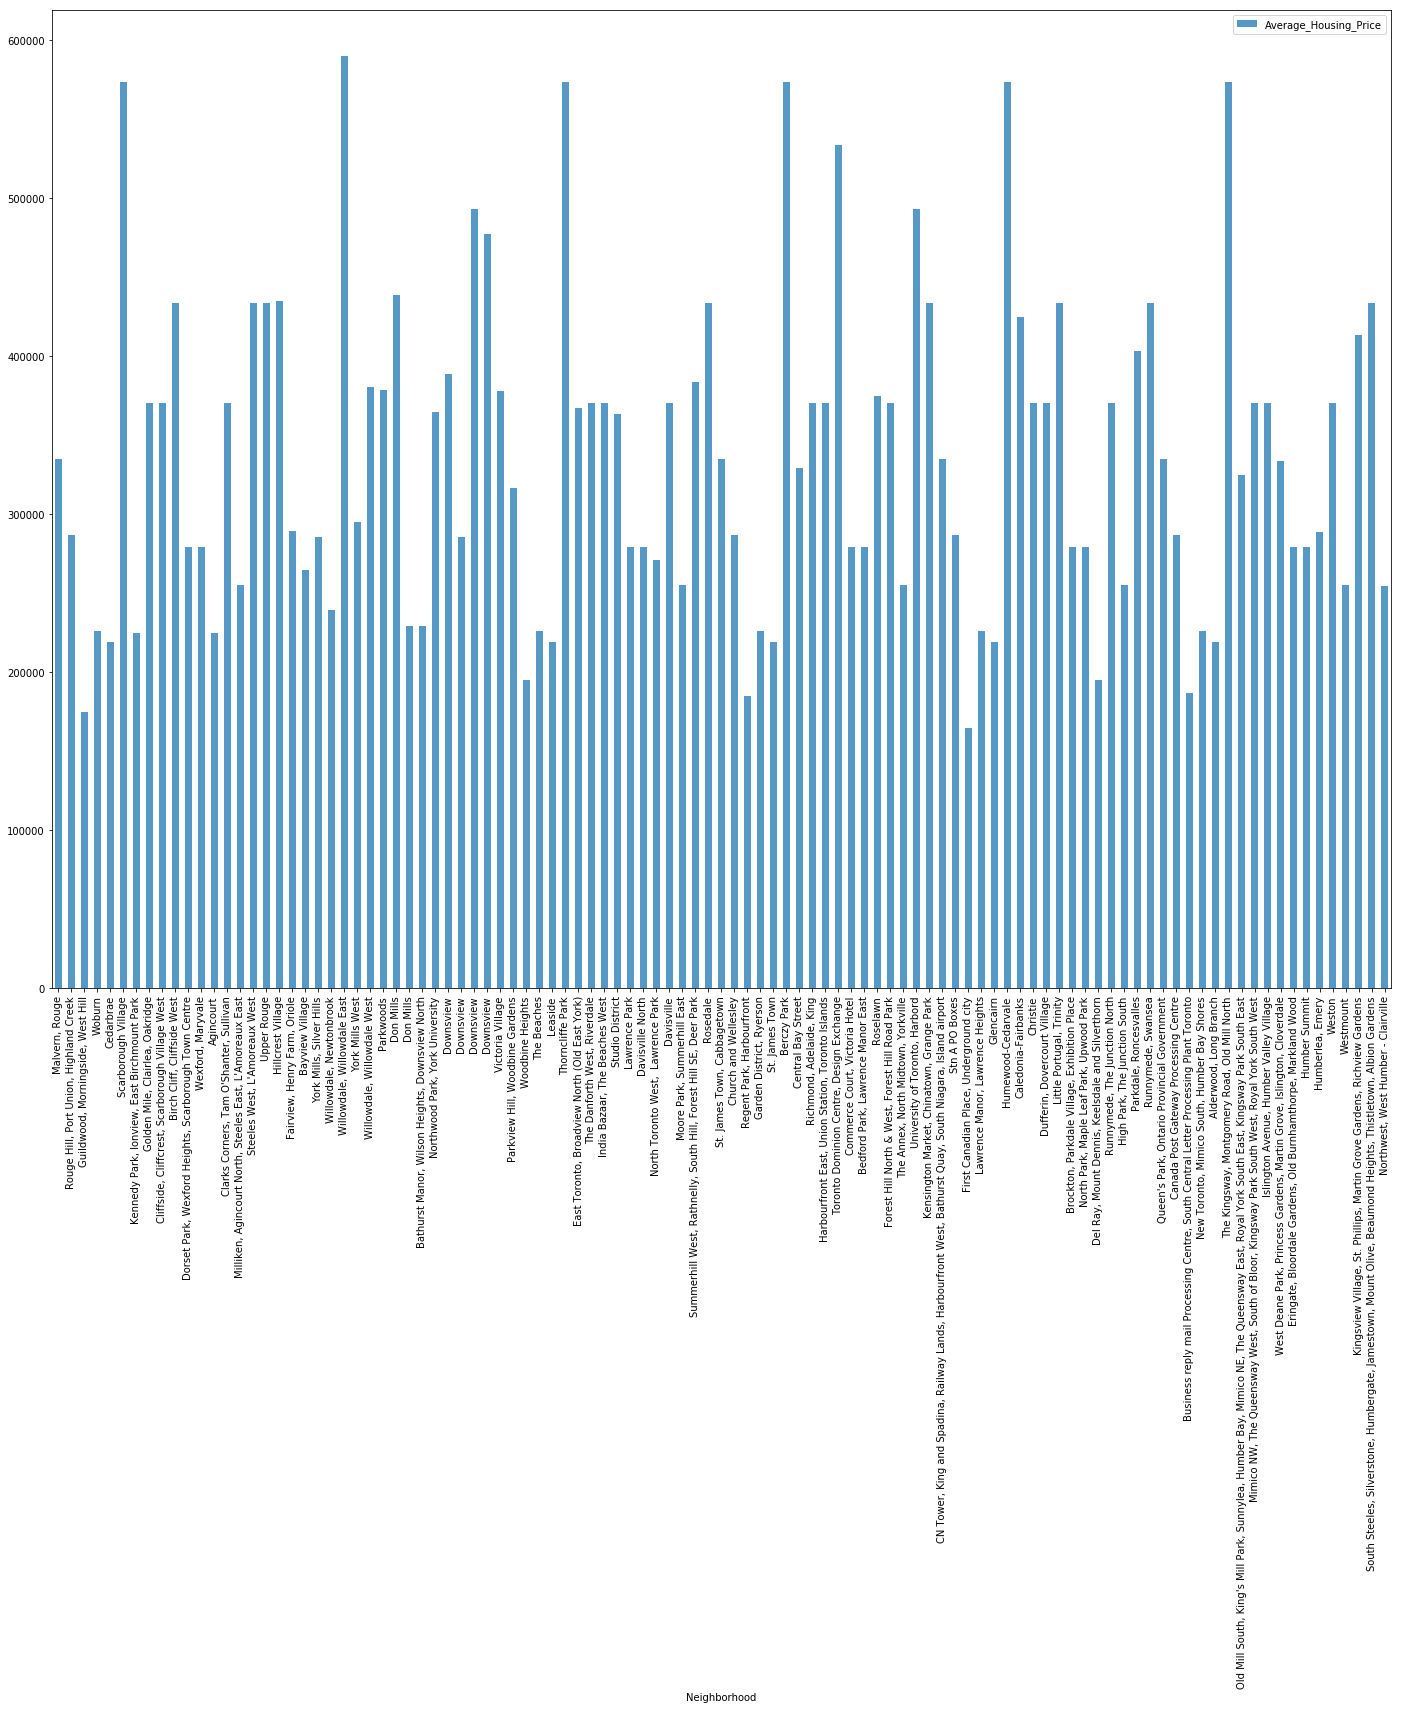

In [84]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

### School Rating by Clusters


In [85]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster4":df3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [86]:
new_Scarborough=Scarborough_merged.set_index("Neighborhood",drop=True)
#delete the new column
#Source:https://www.greatschools.org
Scarborough_school_ratings=pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]})

In [87]:
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

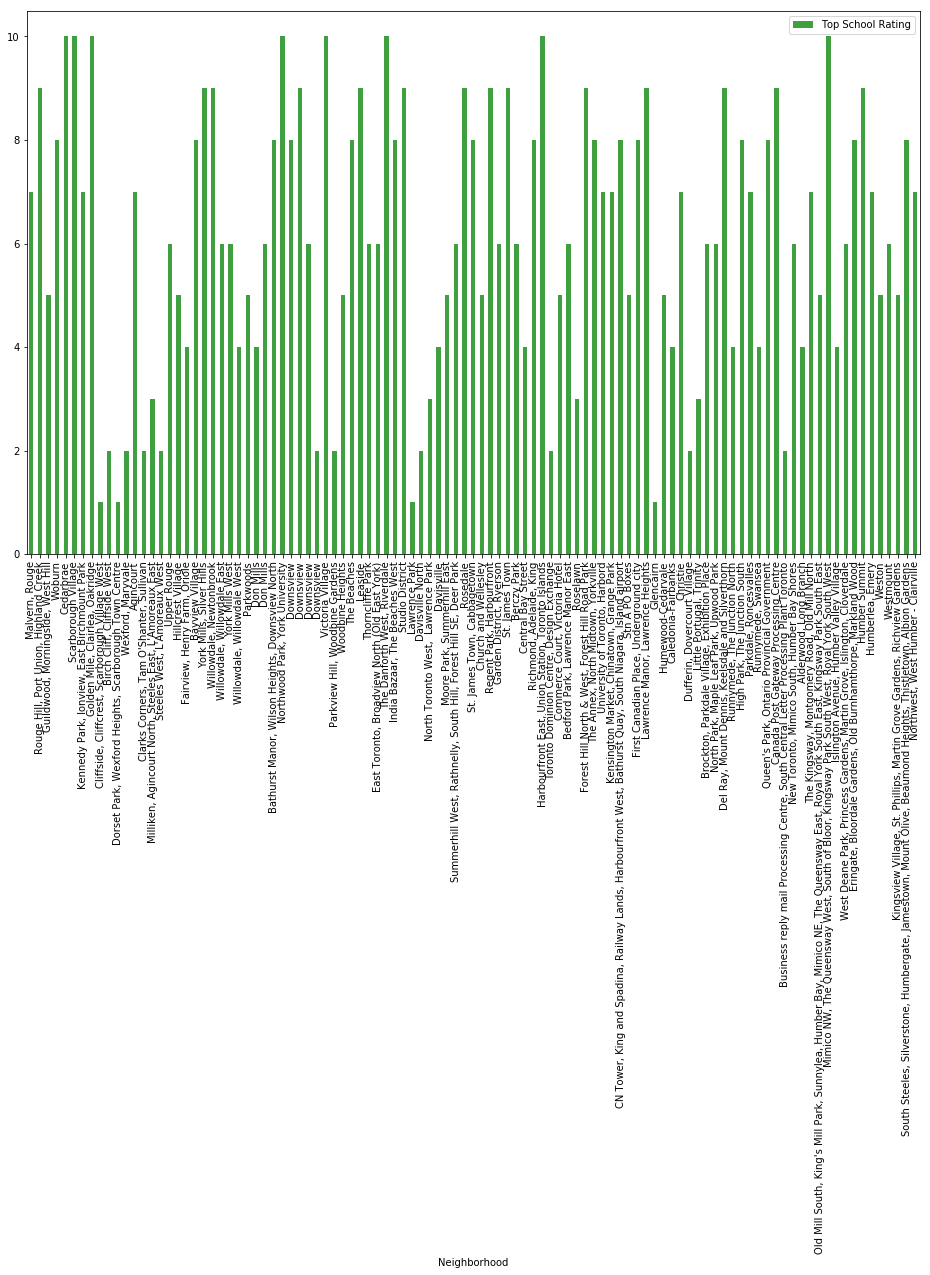

In [88]:
Scarborough_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75);

Conclusion: In this project, using k-means cluster algorithm I separated the neighborhood into 10(Ten) different clusters and for 103 different lattitude and logitude from dataset, which have very-similar neighborhoods around them. Using the charts above results presented to a particular neighborhood based on average house prices and school rating have been made.